In [87]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import community as community_louvain
from typing import List, Dict, Set, Tuple



plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [20]:
class ReseauSocial:

    
    def __init__(self):
        self.utilisateurs = set()
        self.liste_adjacence = {}  # Structure principale
        self.matrice_adjacence = None
        self.graphe = nx.Graph()  # Graphe NetworkX
        self.index_utilisateurs = {}  # Pour la matrice d'adjacence
    
    def ajouter_utilisateur(self, nom: str):
        """Ajoute un utilisateur au réseau"""
        if nom not in self.utilisateurs:
            self.utilisateurs.add(nom)
            self.liste_adjacence[nom] = set()
            self.graphe.add_node(nom)
            print(f"Utilisateur '{nom}' ajouté")
    
    def ajouter_amitie(self, user1: str, user2: str):
        """Ajoute une relation d'amitié (arête non-orientée)"""
        # Vérifier que les utilisateurs existent
        if user1 not in self.utilisateurs:
            self.ajouter_utilisateur(user1)
        if user2 not in self.utilisateurs:
            self.ajouter_utilisateur(user2)
        
        # Pas de boucles (pas d'amitié avec soi-même)
        if user1 == user2:
            print(f" Impossible : un utilisateur ne peut pas être ami avec lui-même")
            return
        
        # Ajouter l'arête (non-orientée)
        self.liste_adjacence[user1].add(user2)
        self.liste_adjacence[user2].add(user1)
        self.graphe.add_edge(user1, user2)
        print(f"Amitié ajoutée : {user1} ↔ {user2}")
    
    def construire_matrice_adjacence(self):
        """Construit la matrice d'adjacence du graphe"""
        n = len(self.utilisateurs)
        self.matrice_adjacence = np.zeros((n, n), dtype=int)
        
        # Créer un mapping utilisateur -> index
        self.index_utilisateurs = {user: i for i, user in enumerate(sorted(self.utilisateurs))}
        
        # Remplir la matrice
        for user, amis in self.liste_adjacence.items():
            i = self.index_utilisateurs[user]
            for ami in amis:
                j = self.index_utilisateurs[ami]
                self.matrice_adjacence[i][j] = 1
        
        print(f"Matrice d'adjacence construite ({n}x{n})")
        return self.matrice_adjacence

print(" Classe ReseauSocial cree ")

 Classe ReseauSocial cree 


In [97]:
# Méthodes d'affichage

def afficher_statistiques(self):
   
    nb_utilisateurs = len(self.utilisateurs)
    nb_aretes = self.graphe.number_of_edges()
    print(" STATISTIQUES DU RÉSEAU")

    print(f"Nombre d'utilisateurs : {nb_utilisateurs}")
    print(f"Nombre d'amitiés : {nb_aretes}")
    print(f"Densité du graphe : {nx.density(self.graphe):.3f}")
    
    if nb_utilisateurs > 0:
        degres = [self.graphe.degree(u) for u in self.utilisateurs]
        print(f"Degré moyen : {np.mean(degres):.2f}")
        print(f"Degré max : {max(degres)}")
        print(f"Degré min : {min(degres)}")
   

def afficher_liste_adjacence(self):

    print("\n LISTE D'ADJACENCE :")
   
    for user in sorted(self.utilisateurs):
        amis = sorted(self.liste_adjacence[user])
        print(f"{user:15} → {amis}")
 

def afficher_matrice_adjacence(self):
    if self.matrice_adjacence is None:
        self.construire_matrice_adjacence()
    
    print("\n MATRICE D'ADJACENCE :")
 
    
    # Afficher les noms en en-tête
    users_sorted = sorted(self.utilisateurs)
    print("    ", end="")
    for user in users_sorted:
        print(f"{user[:8]:8}", end=" ")
    print()
    
    # Afficher la matrice
    for i, user in enumerate(users_sorted):
        print(f"{user[:8]:8}", end=" ")
        for j in range(len(users_sorted)):
            print(f"{self.matrice_adjacence[i][j]:8}", end=" ")
        print()
    

# Ajouter ces méthodes à la classe
ReseauSocial.afficher_statistiques = afficher_statistiques
ReseauSocial.afficher_liste_adjacence = afficher_liste_adjacence
ReseauSocial.afficher_matrice_adjacence = afficher_matrice_adjacence

print(" Méthodes d'affichage ajoutées!")

 Méthodes d'affichage ajoutées!


In [94]:
#Visualisation et Sauvegarde

def visualiser(self, titre="Réseau Social"):

    plt.figure(figsize=(12, 8))
    
    # Layout pour une belle disposition
    pos = nx.spring_layout(self.graphe, seed=42, k=1, iterations=50)
    
    # Dessiner le graphe
    nx.draw_networkx_nodes(self.graphe, pos, 
                          node_color='lightblue',
                          node_size=800,
                          alpha=0.9)
    
    nx.draw_networkx_labels(self.graphe, pos, 
                           font_size=10,
                           font_weight='bold')
    
    nx.draw_networkx_edges(self.graphe, pos, 
                          width=2,
                          alpha=0.5,
                          edge_color='gray')
    
    plt.title(titre, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def sauvegarder(self, fichier: str):
    with open(fichier, 'w') as f:
        for user1, user2 in self.graphe.edges():
            f.write(f"{user1},{user2}\n")
    print(f"Réseau sauvegardé dans '{fichier}'")

def charger(self, fichier: str):
    with open(fichier, 'r') as f:
        for ligne in f:
            user1, user2 = ligne.strip().split(',')
            self.ajouter_amitie(user1, user2)
    print(f"Réseau chargé depuis '{fichier}'")

# Ajouter ces méthodes à la classe
ReseauSocial.visualiser = visualiser
ReseauSocial.sauvegarder = sauvegarder
ReseauSocial.charger = charger

print(" Méthodes de visualisation et sauvegarde ajoutées")

 Méthodes de visualisation et sauvegarde ajoutées


In [98]:
def generer_noms_utilisateurs(n: int) -> List[str]:
    prenoms = [
        "Alice", "Bob", "Charlie", "Diana", "Emma", "Frank", "Grace", "Henry",
        "Iris", "Jack", "Kate", "Leo", "Maria", "Nathan", "Olivia", "Paul",
        "Quinn", "Rose", "Sam", "Tom", "Uma", "Victor", "Wendy", "Xavier",
        "Yara", "Zack", "Anna", "Ben", "Clara", "David", "Eva", "Felix"
    ]
    return prenoms[:n]

def generer_reseau_aleatoire(nb_utilisateurs: int = 25, probabilite_amitie: float = 0.15):
  
    reseau = ReseauSocial()
    noms = generer_noms_utilisateurs(nb_utilisateurs)
    
    print(f"\n Génération d'un réseau aléatoire...")
    print(f"   Utilisateurs: {nb_utilisateurs}")
    print(f"   Probabilité d'amitié: {probabilite_amitie}\n")
    
    # Ajouter tous les utilisateurs
    for nom in noms:
        reseau.ajouter_utilisateur(nom)
    
    # Créer des amitiés aléatoires
    for i, user1 in enumerate(noms):
        for user2 in noms[i+1:]:
            if random.random() < probabilite_amitie:
                reseau.ajouter_amitie(user1, user2)
    
    return reseau

def generer_reseau_avec_communautes(nb_communautes: int = 3, taille_communaute: int = 8):
    
    reseau = ReseauSocial()
    noms = generer_noms_utilisateurs(nb_communautes * taille_communaute)
    
    print(f"\n Génération d'un réseau avec communautés...")
    print(f"   Nombre de communautés: {nb_communautes}")
    print(f"   Taille par communauté: {taille_communaute}\n")
    
    # Ajouter tous les utilisateurs
    for nom in noms:
        reseau.ajouter_utilisateur(nom)
    
    # Créer des communautés denses
    for c in range(nb_communautes):
        debut = c * taille_communaute
        fin = (c + 1) * taille_communaute
        communaute = noms[debut:fin]
        
        # Connexions internes (haute densité)
        for i, user1 in enumerate(communaute):
            for user2 in communaute[i+1:]:
                if random.random() < 0.6:  # 60% de connexions internes
                    reseau.ajouter_amitie(user1, user2)
    
    # Quelques connexions entre communautés (basse densité)
    for _ in range(nb_communautes * 2):
        user1 = random.choice(noms)
        user2 = random.choice(noms)
        if user1 != user2:
            reseau.ajouter_amitie(user1, user2)
    
    return reseau

print(" Fonctions de génération créées!")

 Fonctions de génération créées!



 Génération d'un réseau aléatoire...
   Utilisateurs: 25
   Probabilité d'amitié: 0.15

Utilisateur 'Alice' ajouté
Utilisateur 'Bob' ajouté
Utilisateur 'Charlie' ajouté
Utilisateur 'Diana' ajouté
Utilisateur 'Emma' ajouté
Utilisateur 'Frank' ajouté
Utilisateur 'Grace' ajouté
Utilisateur 'Henry' ajouté
Utilisateur 'Iris' ajouté
Utilisateur 'Jack' ajouté
Utilisateur 'Kate' ajouté
Utilisateur 'Leo' ajouté
Utilisateur 'Maria' ajouté
Utilisateur 'Nathan' ajouté
Utilisateur 'Olivia' ajouté
Utilisateur 'Paul' ajouté
Utilisateur 'Quinn' ajouté
Utilisateur 'Rose' ajouté
Utilisateur 'Sam' ajouté
Utilisateur 'Tom' ajouté
Utilisateur 'Uma' ajouté
Utilisateur 'Victor' ajouté
Utilisateur 'Wendy' ajouté
Utilisateur 'Xavier' ajouté
Utilisateur 'Yara' ajouté
Amitié ajoutée : Alice ↔ Charlie
Amitié ajoutée : Alice ↔ Wendy
Amitié ajoutée : Bob ↔ Diana
Amitié ajoutée : Bob ↔ Grace
Amitié ajoutée : Bob ↔ Kate
Amitié ajoutée : Bob ↔ Wendy
Amitié ajoutée : Charlie ↔ Diana
Amitié ajoutée : Charlie ↔ Iris
Ami

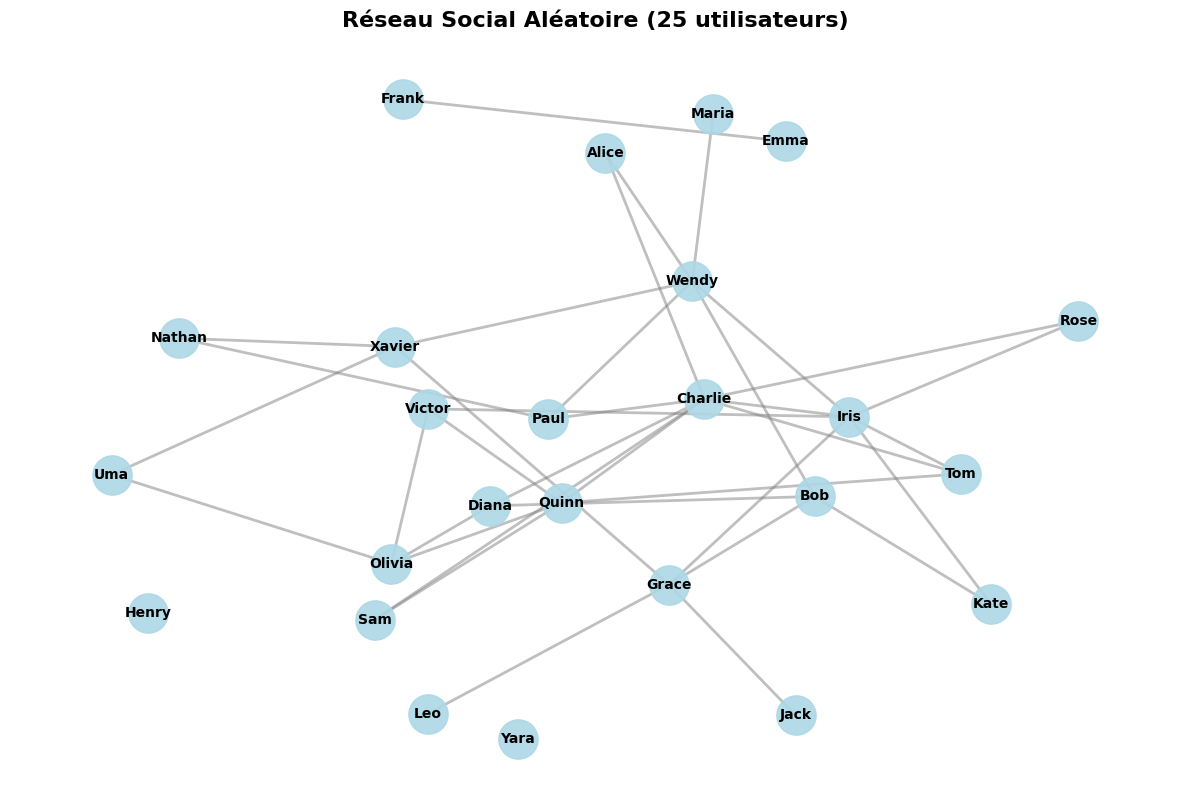

In [99]:
# Générer un réseau aléatoire de 25 utilisateurs
reseau_aleatoire = generer_reseau_aleatoire(nb_utilisateurs=25, probabilite_amitie=0.15)
reseau_aleatoire.afficher_statistiques()
reseau_aleatoire.afficher_matrice_adjacence()
reseau_aleatoire.visualiser("Réseau Social Aléatoire (25 utilisateurs)")

In [100]:
print(" application de lalgorithme louvain \n")

# Appliquer Louvain
partition = community_louvain.best_partition(reseau_communautes.graphe)

# Calculer la modularité
modularity = community_louvain.modularity(partition, reseau_communautes.graphe)

print(f"Score de modularité : {modularity:.4f}")
print(f"Nombre de communautés détectées : {max(partition.values()) + 1}")

 application de lalgorithme louvain 

Score de modularité : 0.5810
Nombre de communautés détectées : 3


In [101]:
print("repartition des communautes :")

communautes_dict = {}
for user, comm_id in partition.items():
    if comm_id not in communautes_dict:
        communautes_dict[comm_id] = []
    communautes_dict[comm_id].append(user)

for comm_id, membres in sorted(communautes_dict.items()):
    print(f"-Communauté {comm_id} ({len(membres)} membres):")
    print(f"    {sorted(membres)}")

repartition des communautes :
-Communauté 0 (8 membres):
    ['Iris', 'Jack', 'Kate', 'Leo', 'Maria', 'Nathan', 'Olivia', 'Paul']
-Communauté 1 (8 membres):
    ['Alice', 'Bob', 'Charlie', 'Diana', 'Emma', 'Frank', 'Grace', 'Henry']
-Communauté 2 (8 membres):
    ['Quinn', 'Rose', 'Sam', 'Tom', 'Uma', 'Victor', 'Wendy', 'Xavier']


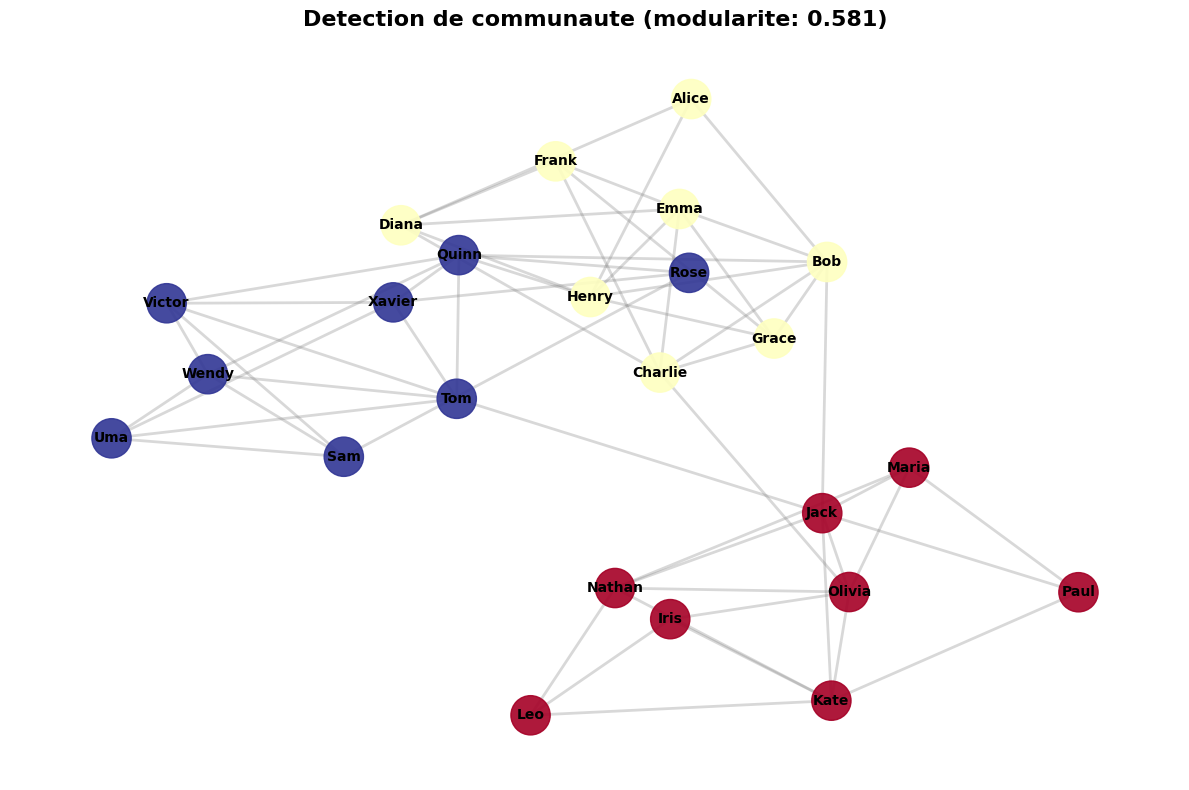

In [102]:
# Visualiser avec les couleurs 
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(reseau_communautes.graphe, seed=42, k=1, iterations=50)

# palette de couleurs
import matplotlib.cm as cm
nb_communautes = max(partition.values()) + 1
colors = [partition[node] for node in reseau_communautes.graphe.nodes()]

# Dessiner
nx.draw_networkx_nodes(reseau_communautes.graphe, pos,
                      node_color=colors,
                      node_size=800,
                      cmap=cm.RdYlBu,
                      alpha=0.9)

nx.draw_networkx_labels(reseau_communautes.graphe, pos,
                       font_size=10,
                       font_weight='bold')

nx.draw_networkx_edges(reseau_communautes.graphe, pos,
                      width=2,
                      alpha=0.3,
                      edge_color='gray')

plt.title(f"Detection de communaute (modularite: {modularity:.3f})", 
         fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

In [103]:
print("Analyse des communautes")

for comm_id, membres in sorted(communautes_dict.items()):
    # sousgraphe pour cette communaute
    sous_graphe = reseau_communautes.graphe.subgraph(membres)
    
    #les metriques
    nb_aretes_internes = sous_graphe.number_of_edges()
    nb_aretes_possibles = len(membres) * (len(membres) - 1) // 2
    
    if nb_aretes_possibles > 0:
        densite = nb_aretes_internes / nb_aretes_possibles
    else:
        densite = 0
    
    print(f"\n __Communaute {comm_id}:")
    print(f"   Membres: {len(membres)}")
    print(f"   Connexions internes: {nb_aretes_internes}")
    print(f"   Densite interne: {densite:.3f}")
    

Analyse des communautes

 __Communaute 0:
   Membres: 8
   Connexions internes: 17
   Densite interne: 0.607

 __Communaute 1:
   Membres: 8
   Connexions internes: 19
   Densite interne: 0.679

 __Communaute 2:
   Membres: 8
   Connexions internes: 18
   Densite interne: 0.643


In [104]:
print("comparaison avec les groupes initiaux\n")


# Groupes théoriques
noms = generer_noms_utilisateurs(24)
groupes_theoriques = {
    0: noms[0:8],
    1: noms[8:16],
    2: noms[16:24]
}

print("\n_Groupes theoriques (predefinis) :")
for gid, membres in groupes_theoriques.items():
    print(f"   Groupe {gid}: {membres}")

print("\n_Communautes detectees par Louvain:")
for comm_id, membres in sorted(communautes_dict.items()):
    print(f"   Communauté {comm_id}: {sorted(membres)}")

comparaison avec les groupes initiaux


_Groupes theoriques (predefinis) :
   Groupe 0: ['Alice', 'Bob', 'Charlie', 'Diana', 'Emma', 'Frank', 'Grace', 'Henry']
   Groupe 1: ['Iris', 'Jack', 'Kate', 'Leo', 'Maria', 'Nathan', 'Olivia', 'Paul']
   Groupe 2: ['Quinn', 'Rose', 'Sam', 'Tom', 'Uma', 'Victor', 'Wendy', 'Xavier']

_Communautes detectees par Louvain:
   Communauté 0: ['Iris', 'Jack', 'Kate', 'Leo', 'Maria', 'Nathan', 'Olivia', 'Paul']
   Communauté 1: ['Alice', 'Bob', 'Charlie', 'Diana', 'Emma', 'Frank', 'Grace', 'Henry']
   Communauté 2: ['Quinn', 'Rose', 'Sam', 'Tom', 'Uma', 'Victor', 'Wendy', 'Xavier']
